In [1]:
import cv2

In [2]:
from deepface import DeepFace

In [3]:
img = cv2.imread('happyboy.jpg')

In [4]:
import matplotlib.pyplot as plt

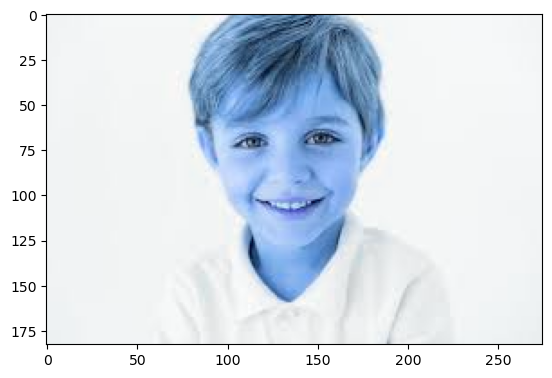

In [5]:
plt.imshow(img)

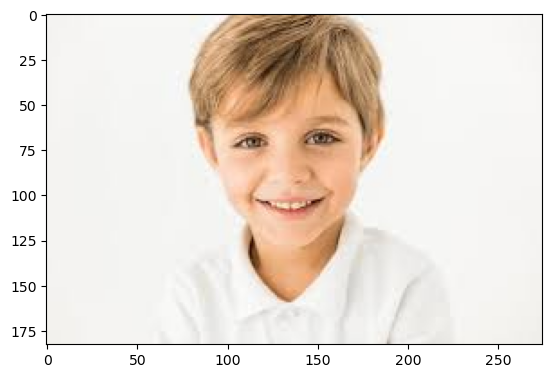

In [6]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [7]:
predictions = DeepFace.analyze(img)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:18<00:00,  4.74s/it]


In [8]:
predictions

[{'emotion': {'angry': np.float32(1.5416482e-08),
   'disgust': np.float32(3.6669276e-13),
   'fear': np.float32(4.369971e-08),
   'happy': np.float32(99.99957),
   'sad': np.float32(2.2487031e-06),
   'surprise': np.float32(1.3551396e-07),
   'neutral': np.float32(0.0004292459)},
  'dominant_emotion': 'happy',
  'region': {'x': 81,
   'y': 29,
   'w': 107,
   'h': 107,
   'left_eye': (151, 68),
   'right_eye': (113, 70)},
  'face_confidence': 0.93,
  'age': 21,
  'gender': {'Woman': np.float32(99.45034), 'Man': np.float32(0.54966486)},
  'dominant_gender': 'Woman',
  'race': {'asian': np.float32(4.060841e-09),
   'indian': np.float32(1.1481847e-08),
   'black': np.float32(6.5342393e-13),
   'white': np.float32(99.98853),
   'middle eastern': np.float32(0.010169133),
   'latino hispanic': np.float32(0.0012975279)},
  'dominant_race': 'white'}]

In [9]:
type(predictions)

list

In [10]:
predictions[0]['dominant_emotion']


'happy'

In [11]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


In [12]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#print(faceCascade.empty())
faces = faceCascade.detectMultiScale(gray, 1.1, 4)

# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)


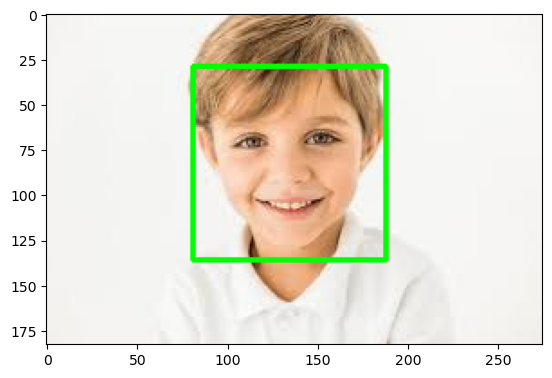

In [13]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [14]:
font = cv2.FONT_HERSHEY_SIMPLEX

# Use putText() method for
# inserting text on video
cv2.putText(img,
            predictions[0]['dominant_emotion'],
            (0, 50),
            font, 1,
            (0, 0, 255),
            2,
            cv2.LINE_4);


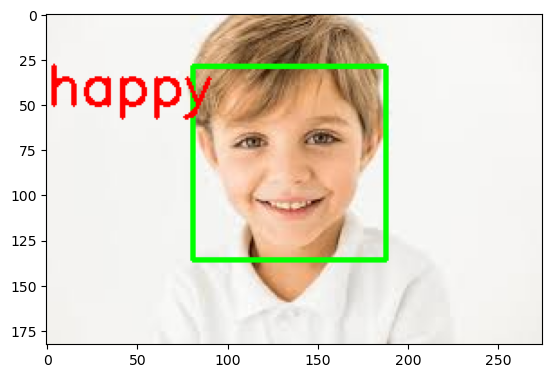

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [16]:
img = cv2.imread('sadwoman.jpg')

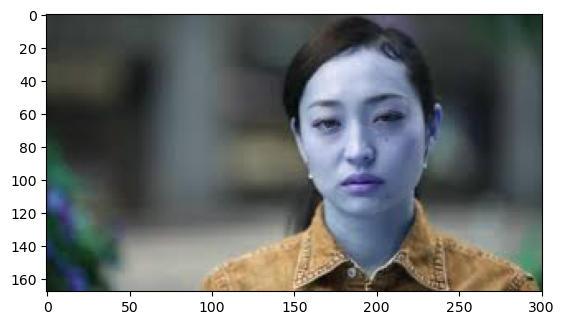

In [17]:
plt.imshow(img)

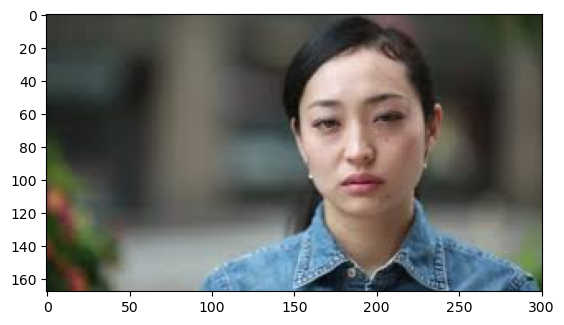

In [18]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [19]:
predictions = DeepFace.analyze(img)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.05it/s]


In [20]:
predictions

[{'emotion': {'angry': np.float32(2.6619916),
   'disgust': np.float32(0.003426707),
   'fear': np.float32(8.047384),
   'happy': np.float32(0.00043770415),
   'sad': np.float32(84.96433),
   'surprise': np.float32(0.00021947315),
   'neutral': np.float32(4.322212)},
  'dominant_emotion': 'sad',
  'region': {'x': 140,
   'y': 25,
   'w': 100,
   'h': 100,
   'left_eye': (208, 61),
   'right_eye': (171, 66)},
  'face_confidence': 0.91,
  'age': 29,
  'gender': {'Woman': np.float32(99.92518), 'Man': np.float32(0.07482469)},
  'dominant_gender': 'Woman',
  'race': {'asian': np.float32(98.18133),
   'indian': np.float32(0.31204888),
   'black': np.float32(0.0024309577),
   'white': np.float32(0.24405855),
   'middle eastern': np.float32(0.0029538197),
   'latino hispanic': np.float32(1.2571758)},
  'dominant_race': 'asian'}]

In [ ]:
import cv2  ### pip install opencv-python
# pip install opencv-contrib-python fullpackage
from deepface import DeepFace  ### pip install deepface

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)
# Check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    result = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)


    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    font = cv2.FONT_HERSHEY_SIMPLEX

    # Use putText() method for inserting text on video
    cv2.putText(frame,
                result[0]['dominant_emotion'],
                (50, 50),
                font,
                3,
                (0, 0, 255),
                2,
                cv2.LINE_4)

    cv2.imshow('Original video', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
